In [1]:
from matplotlib import pyplot as plt

import octopus.dataset as ds
import octopus.visualization as vis
from octopus.core import predict, metrics, GPEdgeTracer
from octopus.preprocessing import compute_grad_image

In [2]:
import importlib

importlib.reload(predict)
importlib.reload(vis)

<module 'octopus.visualization' from '/Users/uzaykaradag/Developer/octopus/octopus/visualization/__init__.py'>

In [3]:
scans, initial_elms, ground_truth_elm = ds.load_dataset()

In [4]:
scan_list = list(scans.keys())

In [5]:
test_idx = scan_list[500]
scan, initial, gt = scans[test_idx], initial_elms[test_idx], ground_truth_elm[test_idx]

In [6]:
grad_img = compute_grad_image(scan)

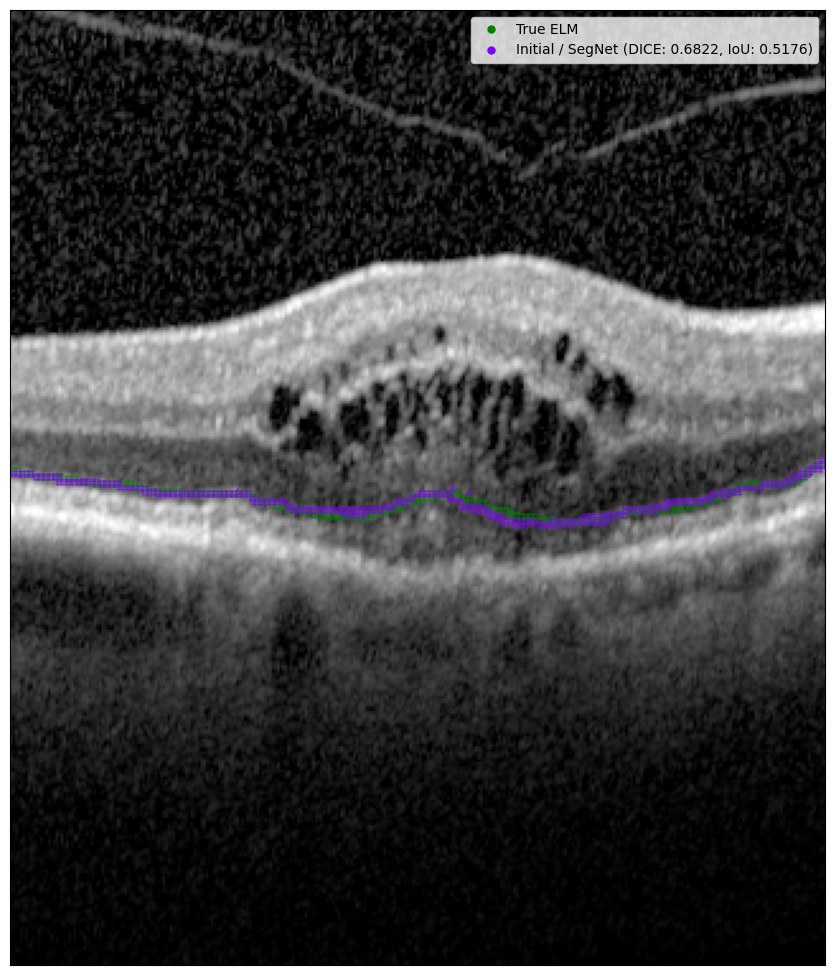

In [7]:
fig = vis.display_scan(scan, {'Initial / SegNet': initial}, gt_elm=gt)

## ELM Prediction with Matern kernel without the use of Recursive Bayesian Scheme for initialisation

In [13]:
baseline_kernel = {'kernel': 'Matern', 'sigma_f': 60, 'length_scale': 20, 'nu': 2.5}

In [8]:
gp_kwargs = dict(
    kernel_options= baseline_kernel,
    delta_x=8,
    score_thresh=0.5,
    n_samples=1000,
    seed=1,
    noise_y=0.5,
    keep_ratio=0.1,
    pixel_thresh=5,
    fix_endpoints=True,
    return_std=True
)
init_points = initial[[0, -1], :][:, [1, 0]]

# Instantiate algorithm using parameters in __init__()
elm_tracer = GPEdgeTracer(init_points, grad_img, **gp_kwargs)

In [9]:
elm_prediction, _ = elm_tracer()

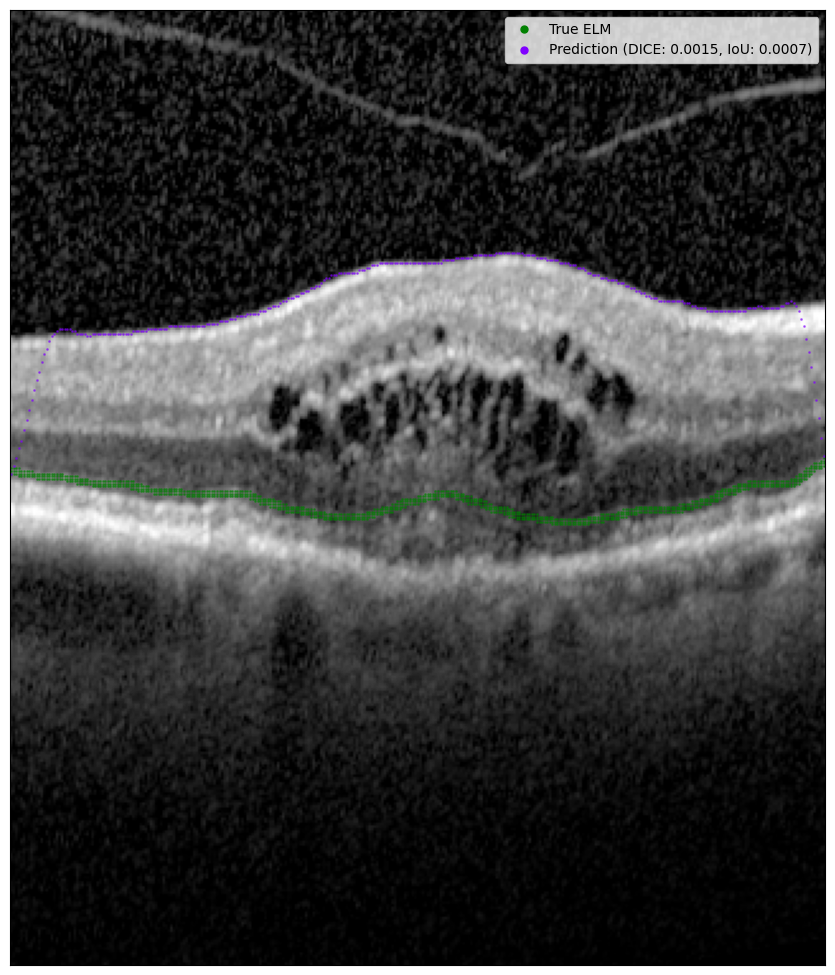

In [10]:
fig1 = vis.display_scan(scan, {'Prediction': elm_prediction}, gt_elm=gt)

In [12]:
fig1.savefig('figures/elm_prediction_no_obs.pdf')

## Use of Recursive Bayesian Scheme from the start

In [18]:
pred_elm_w_obs50 = predict.trace_elm(grad_img, gt, num_runs=1, subset_size=50, kernel_options=baseline_kernel)

In [19]:
pred_elm_w_obs100 = predict.trace_elm(grad_img, gt, num_runs=1, subset_size=100, kernel_options=baseline_kernel)

In [20]:
pred_elm_w_obs200 = predict.trace_elm(grad_img, gt, num_runs=1, subset_size=100, kernel_options=baseline_kernel)

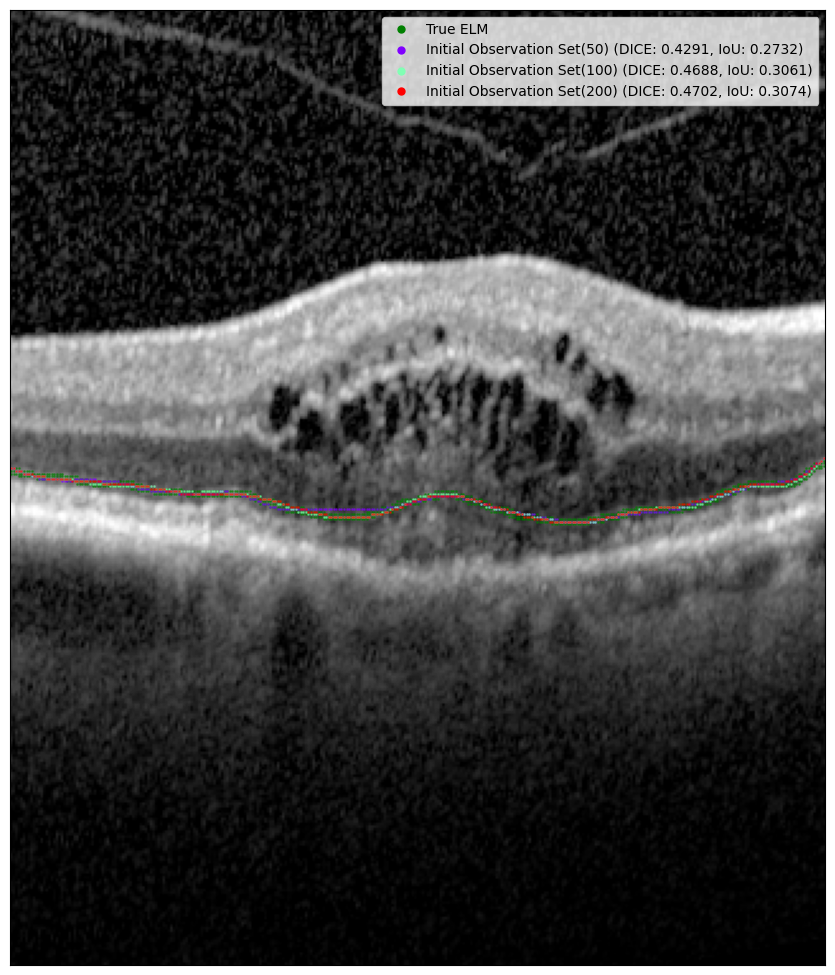

In [21]:
fig2 = vis.display_scan(scan, {'Initial Observation Set(50)': pred_elm_w_obs50, 'Initial Observation Set(100)': pred_elm_w_obs100, 'Initial Observation Set(200)': pred_elm_w_obs200}, gt_elm=gt)

In [22]:
fig2.savefig('figures/elm_prediction_w_obs_comparison.pdf')

## Comparison of SegNet + GPET vs Ground-Truth + GPET

In [26]:
pred_elm_w_obs50_sn = predict.trace_elm(grad_img, initial, num_runs=100, subset_size=50, kernel_options=baseline_kernel)

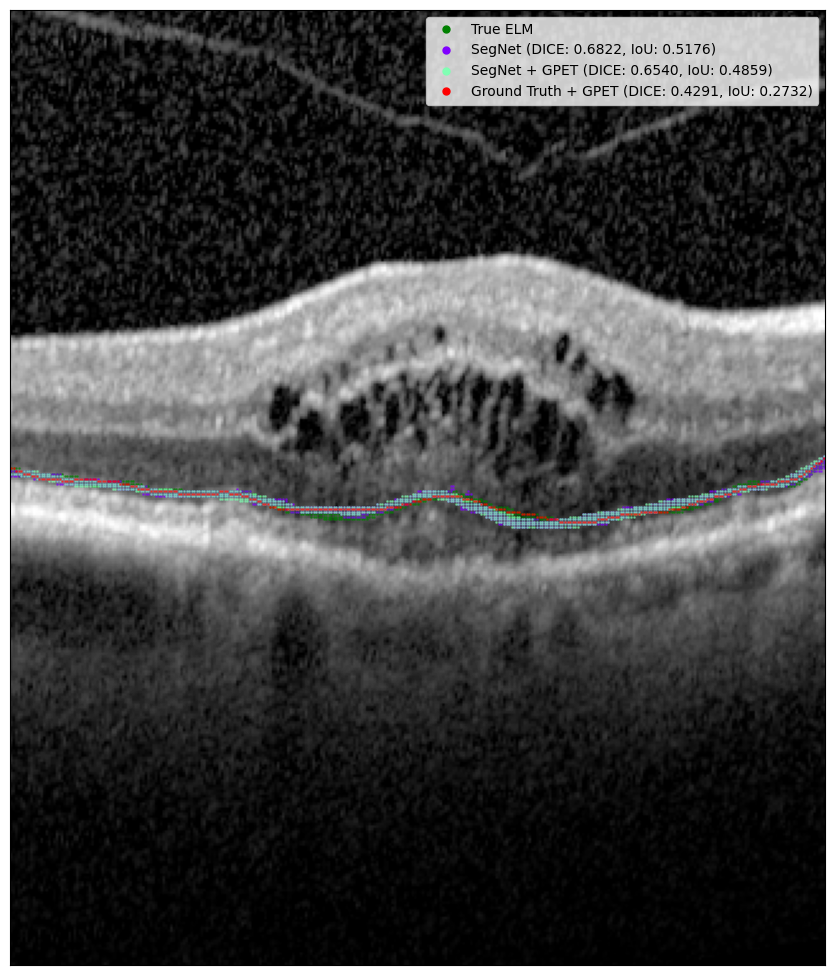

In [27]:
fig3 = vis.display_scan(scan, {'SegNet': initial, 'SegNet + GPET': pred_elm_w_obs50_sn, 'Ground Truth + GPET': pred_elm_w_obs50}, gt_elm=gt)